## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 6*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Consideramos de nuevo la imagen rice.jpg. Hacer lo siguiente: 
- Binarizar la imagen.
- Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen.



--------

#### *Importar librerías*

Como primer paso, se importan las librerías necesarias para el desarrollo del ejercicio.

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy import ndimage
import os

#### *Definición de funciones*

Como segundo paso, se definen las funciones a utilizar.

In [12]:
def binarize(img, threshold):
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + threshold)
    return img

def connectedComponents(img):
    labeled_img, num_labels = label(img, connectivity=2, return_num=True)
    return labeled_img, num_labels

#### *Carga y binarización de imagen*

Luego, se carga la imagen y se binariza.

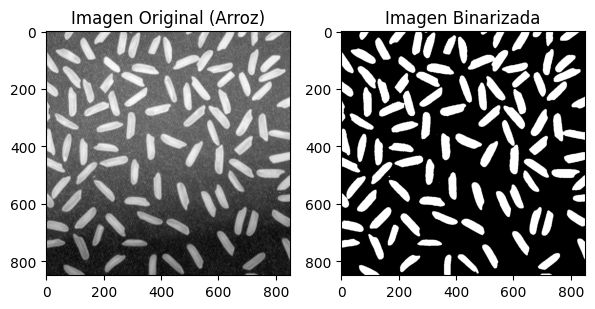

In [13]:
# Se carga la imagen
rice_img = cv2.imread('img/rice.jpg', 0)

# Se binariza la imagen utilzando segmentación para obtener los granos de arroz         -> Mismo proceso que en Lista01
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(rice_img)
blurred_rice_img_clahe = cv2.GaussianBlur(clahe_img, (5, 5), 0)
_, binarizada = cv2.threshold(blurred_rice_img_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Se grafican las imágenes
plt.figure(figsize=(9, 4))

plt.subplot(1, 3, 1)
plt.imshow(rice_img, cmap='gray')
plt.title('Imagen Original (Arroz)')

plt.subplot(1, 3, 2)
plt.imshow(binarizada, cmap='gray')
plt.title('Imagen Binarizada')

plt.tight_layout()
plt.show()


#### *Algoritmo de componentes conexos*

Finalmente, se aplica el algoritmo de componentes conexos sobre la binarización y se cuentan cuántos granos de arroz hay en la imagen.

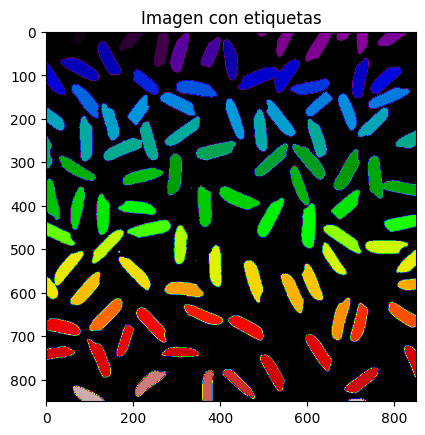

Número de etiquetas: 102


In [14]:
conexo, numEtiquetas = connectedComponents(binarizada)

# Mostrar la imagen con etiquetas
plt.imshow(conexo, cmap='nipy_spectral')
plt.title('Imagen con etiquetas')
plt.show()

# Mostrar el número de etiquetas
print('Número de etiquetas:', numEtiquetas)

En este caso, cabe destacar que hay algunos arroces que están muy juntos y el algoritmo los cuenta como uno solo. Asimismo, hay manchas negras que el algoritmo también cuenta como arroz. 

Como resultado, se puede utilizar operatoria morfológica para separar los granos de arroz que están muy juntos y así contarlos de manera individual.

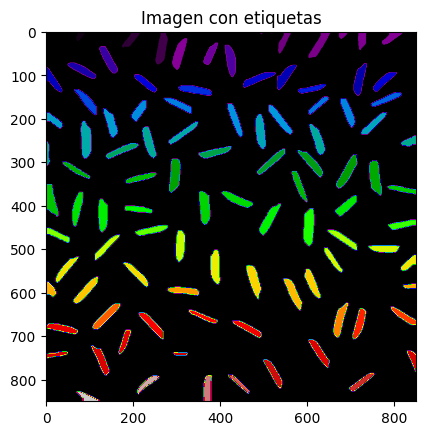

Número de etiquetas: 99


In [15]:
# PROCEDIMIENTO ADICIONAL NO INDICADO EN LAS INSTRUCCIONES -----------------------------------------------------------

# Erosión para separar los granos de arroz
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 6))

# Operaciones morfológicas
eroded_rice = cv2.erode(binarizada, kernel, iterations=1)
opening_rice = cv2.morphologyEx(eroded_rice, cv2.MORPH_OPEN, kernel, iterations=3)
eroded_rice = cv2.erode(opening_rice, kernel, iterations=2)

conexo, numEtiquetas = connectedComponents(eroded_rice)

# Mostrar la imagen con etiquetas
plt.imshow(conexo, cmap='nipy_spectral')
plt.title('Imagen con etiquetas')
plt.show()

# Mostrar el número de etiquetas
print('Número de etiquetas:', numEtiquetas)

Con este último procedimiento, se logró eliminar ciertos puntitos (manchas) en la imagen que el algoritmo de componentes conexos contaba como arroz. Sin embargo, también se eliminaron 2 granos de arroz que estaban muy en el límite y que casi no se veían. 

Como resultado, se puede concluir que la utilizar operatoria morfológica para separar los granos de arroz que están muy juntos y así contarlos de manera individual es una buena opción para mejorar el conteo de granos de arroz en la imagen. Sin embargo, es importante tener en cuenta que se pueden eliminar granos de arroz que son muy pequeños y que están en el límite de la imagen.